In [124]:
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
from visualization.utils import defaultColors
from helpers import load_from_path, save_image

In [125]:
# from mobo.surrogate_model import BoTorchSurrogateModelReapeat, BoTorchSurrogateModel
import torch
import pandas as pd
from pathlib import Path
import numpy as np
import yaml

In [126]:
# .\result\exp4d\optimization_4\marsdet\0\state_dict_noise.pt

path = Path("../result/exp4d/unroll_new/marsdet/0/")
# path = Path("../result/exp/unroll_new/raqnehvi/0/")
# path = Path("../result/peaksS5R3/default/mars/0/")
# path = Path("../result/peaks/default/qnehvi/0/")

res_dict = load_from_path(path)
eval_samples = res_dict["eval_samples"]
batch_size = res_dict["batch_size"]
init_samples = res_dict["init_samples"]

index = eval_samples.index + 1
# index = eval_samples["iterID"] + 1
hv = eval_samples["Hypervolume_indicator"]
mvar_hv = eval_samples["MVaR_Hypervolume_indicator"]



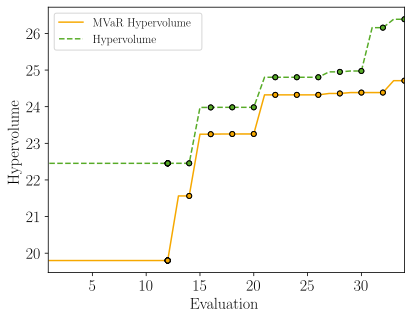

In [127]:
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"],
    # font size
    "font.size": 16,
})

colors = defaultColors

batch_dots = eval_samples["iterID"]*batch_size +init_samples

fig, ax = plt.figure(), plt.gca()
#dashed line and marker
ax.plot(index, mvar_hv, label="MVaR Hypervolume", color=colors[0], linestyle="-")
ax.plot(batch_dots, mvar_hv, color=colors[0], marker="o", linestyle="None", markersize=5, 
        markeredgecolor="black")
           
ax.plot(index, hv, label="Hypervolume", linestyle="--", color=colors[1])
ax.plot(batch_dots, hv, color=colors[1], marker="o", linestyle="None", markersize=5,
        markeredgecolor="black")

ax.set_xlabel("Evaluation")
ax.set_ylabel("Hypervolume")
# ax.set_title("Hypervolume and MVaR Hypervolume")
ax.set_xlim(0.9, index.max())
ax.legend(fontsize=12)

path_folder = Path("./Plots") / path.parts[2]
path_folder.mkdir(exist_ok=True, parents=True)
plt.savefig(path_folder / ("_".join(path.parts[3:-1]) + "_hv.pdf"), dpi=600, format="pdf")
